![Astrofisica Computacional](../logo.png)

---
## 07. Introduction to `AstroPy`. Fundamentals


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we present an introduction to the fundamental use of `astropy`.

---


![](astropy_banner_96.png)

    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages."

`
The `Astropy` package is structured into several submodules. Some of them are:

1. [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

2. [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and the [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

4. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).

5. Plotting of astronomical sky images with [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/)

In addition to the Astropy core package there is an infrastructure of  [Astropy affiliated packages](http://www.astropy.org/affiliated/) dedicated to specific fields of Astronomy or analysis tasks, such as:

- [Astroplan](https://astroplan.readthedocs.io/en/latest/): observation planning
- [Reproject](http://reproject.readthedocs.io/en/stable/): reprojection of sky images
- [Regions](http://astropy-regions.readthedocs.io/en/latest/): handling of sky regions 
- [Photutils](https://photutils.readthedocs.io/en/stable/): source detection and photometry
- [Gammapy](docs.gammapy.org): gamma-ray Astronomy data analysis
- ...




## Installation

To install `astropy` type
```python
conda install astropy 
```

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np


## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

In [2]:
from astropy import units as u

`Quantities` are created by multiplying any number with a unit object:

In [3]:
distance = 1. * u.lightyear
distance

<Quantity 1. lyr>

It can also be done by passing a string with the units into the general `Quantity` object:

In [6]:
time_interval = u.Quantity('1 yr')
time_interval

<Quantity 1. yr>

In [9]:
#distance + time_interval

It is possible to check the availabe units with tab completion on the units module, `u.<TAB>`.

Quantities can be also created using lists and arrays:

In [10]:
distances = np.array([1, 3, 10]) * u.lightyear
distances

<Quantity [ 1.,  3., 10.] lyr>

In [11]:
time_interval.value

1.0

In [12]:
distances.value

array([ 1.,  3., 10.])

The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [13]:
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [14]:
distances.unit

Unit("lyr")

In [15]:
time_interval.unit

Unit("yr")

In [16]:
type(distances)

astropy.units.quantity.Quantity

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [17]:
distances * 10

<Quantity [ 10.,  30., 100.] lyr>

Many numpy functions will work as expected and return again a `Quantity` object:

In [19]:
np.min(distances)

<Quantity 1. lyr>

In [20]:
np.mean(distances)

<Quantity 4.66666667 lyr>

In [25]:
distances + distance

<Quantity [ 2.,  4., 11.] lyr>

But there are exceptions, where the unit handling is not well defined, e.g. in `np.log` arguments have to be dimensionless, such as:

In [27]:
#np.log(30 * u.MeV) # Will raise an UnitConversionError
np.log(30 * u.MeV / (1 * u.MeV))

<Quantity 3.40119738>

Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [4]:
distance

<Quantity 1. lyr>

In [9]:
distance.to('pc')

<Quantity 0.30660139 pc>

In [10]:
distance.to(u.parsec)

<Quantity 0.30660139 pc>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [12]:
speed_of_light = distance / u.year
speed_of_light.to('km/s')

<Quantity 299792.458 km / s>

In [16]:
speed_of_light.to('angstrom/day')

<Quantity 2.59020684e+23 Angstrom / d>

The most practical way to work with units is: efine the input quantities with units, do the computation and forget about the units, convert the final result to the desired units. In most cases there is no need for intermediate unit conversions.

For standardized unit systems such as `'si'` or `'cgs'` there are convenience attributes on the quantity object:

In [18]:
speed_of_light.si

<Quantity 2.99792458e+08 m / s>

In [19]:
speed_of_light.cgs

<Quantity 2.99792458e+10 cm / s>

### 1.2. Equivalencies

In Astronomy and other fields of physics quantities are often measured in more practical units, which are equivalent to the actual physical unit. In `astropy.units` this is handled with the concept of "equivalencies".  

For example consider units to measure spectral quantities such as wavelength, frequency and energy:

In [20]:
frequency = 3e20 * u.hertz
frequency.to('MeV', equivalencies=u.spectral())

<Quantity 1.24070031 MeV>

In [21]:
frequency.to('picometer', equivalencies=u.spectral())

<Quantity 0.99930819 pm>

Or for converting temperatures:

In [22]:
temperature = 25 * u.Celsius

In [23]:
temperature.to("Kelvin", equivalencies=u.temperature())

<Quantity 298.15 K>

In [24]:
with u.imperial.enable():
    print(temperature.to("deg_F", equivalencies=u.temperature()))

77.0 deg_F


## 2. Constants

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants]() submodule:

In [25]:
from astropy import constants as const

const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [28]:
c =const.c
c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [30]:
c.to('pc / s')

<Quantity 9.71561189e-09 pc / s>

In [32]:
print(const.G) # Data about the constant

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [33]:
G = const.G
G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [39]:
G.to(u.au**3/(u.solMass*u.yr**2))

<Quantity 39.47692641 AU3 / (solMass yr2)>

[List of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

### 2.1 Operations with units and constants

Lets define a mass equal of $10$ solar masses

In [40]:
M = 1*u.Msun
M

<Quantity 1. solMass>

and define the corresponding Schwarzschild radius using the imported constants,

In [41]:
G = const.G
c = const.c

rS = 2*G*M/c**2
rS

<Quantity 1.48523205e-27 m solMass / kg>

Note that the solar mass units can be transformed into kg to obtain a radius in units of meters. This is acomplished by the method `.decompose()`, 

In [42]:
rS = rS.decompose()
rS

<Quantity 2953.2500761 m>

In [43]:
rS.to('km')

<Quantity 2.95325008 km>

Now, we will write a function that returns the Schwarzschild radius for a given mass:

In [44]:
def Schw_radius(M):
    '''
    Returns the Schwarzschild radius (in units of km)
    for a given mass M.
    Arguments:
    M : Mass of the central object
    '''
    G = const.G
    c = const.c
    rS = 2*G*M/c**2
    return rS.to('km')
    

In [47]:
Schw_radius(10*u.solMass)

<Quantity 29.53250076 km>

What happen if you give the argument M with the wrong units?

In [18]:
# Schw_radius(1*u.m) # This gives an error!

This can be prevented by using keyword arguments in the function,

In [29]:
def Schw_radius(M=1*u.solMass):
    '''
    Returns the Schwarzschild radius (in units of km)
    for a given mass M.
    Arguments:
    M : Mass of the central object
    '''
    G = const.G
    c = const.c
    rS = 2*G*M/c**2
    return rS.to('km')

Or by using the [astropy.units.quantity_input](http://docs.astropy.org/en/stable/api/astropy.units.quantity_input.html#astropy.units.quantity_input) decorator: 

In [48]:
@u.quantity_input(M=u.solMass)
def Schw_radius(M):
    '''
    Returns the Schwarzschild radius (in units of km)
    for a given mass M.
    Arguments:
    M : Mass of the central object
    '''
    G = const.G
    c = const.c
    rS = 2*G*M/c**2
    return rS.to('km')

In [51]:
Schw_radius(1*u.kg)

<Quantity 1.48523205e-30 km>

## 3. Using quantities with units in other packages

When writing code that uses quantities there is need to use it everywhere in the code. However, when incorporating functions from packages such as [SciPy](https://www.scipy.org/) or [Matplotlib](https://matplotlib.org/)), these operations doesn't know how to handle quantities.

For Matplotlib, we can use the [quantity_support()](http://docs.astropy.org/en/stable/api/astropy.visualization.quantity_support.html) context manager from `astropy`. In order to illustrate this, consider the function

In [52]:
@u.quantity_input(frequency=u.hertz, temperature=u.K)
def blackbody(frequency, temperature):
    '''
    Returns the radiance for a black-body.
    Arguments:
    frequency [hertz]
    temperature [Kelvin] 
    '''
    pre_factor = 2 * (const.h * frequency ** 3) / const.c ** 2
    exponential_factor = 1. / (np.exp((const.h * frequency) / (const.k_B * temperature)) - 1)
    return pre_factor * exponential_factor

In [53]:
blackbody(300 * u.hertz, 5000 * u.K)

<Quantity 1.38259555e-31 Hz3 J s3 / m2>

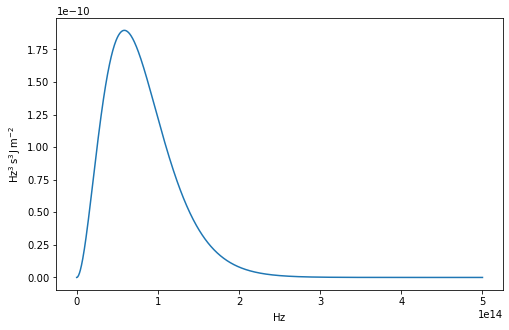

In [54]:
from astropy.visualization import quantity_support

plt.figure(figsize=(8, 5))

temperature = 1000 * u.K
frequencies = np.linspace(1e-2, 0.5e15, 1000) * u.hertz

radiance = blackbody(frequency=frequencies, temperature=temperature)

with quantity_support():   
    plt.plot(frequencies, radiance)

plt.show()

Note that the axes are automatically labeled according to the units used.

---
Another option to work is to convert the quantity to well defined units, strip off the units and re-attach it after the computation (Ths may be tedious but effective):

In [41]:
emin, emax = [1, 10] * u.TeV
energies = np.logspace(np.log10(emin.value), np.log10(emax.value), 10) * emin.unit
energies

<Quantity [ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
            3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ] TeV>

However, some functions may work well. For example, the function `np.geomspace` , works just fine to obtain the same result.

More information at https://numpy.org/doc/stable/reference/generated/numpy.geomspace.html

In [42]:
energies = np.geomspace(emin, emax, 10)
print(energies)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] TeV


## 4. Performance tips 

Quantities are standard numpy arrays and therefore they are suitable for computations with many components. However, when creating a Quantity with commands such as `data * u.m` or `data * u.Unit()` a copy of the data is made by default. This is seen when defining, for example, the array

In [55]:
values = np.ones((500, 500, 500))

and defining from it an array of quantities,

In [56]:
%%timeit
quantity = values * u.au

83.7 ms ± 6.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In order to avoid the copy of the values, we can use the command

In [57]:
%%timeit
quantity = u.Quantity(values, unit="au", copy=False)

2.89 µs ± 4.01 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Note the incredible improvement in the ellapsed time. Another possibility is to use

In [58]:
%%timeit
quantity = values << u.Unit("kpc")

4.13 µs ± 37 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Finally, in order to avoid copies when converting to different units we can use the method `.to_value()` instead of `.to()` 

In [36]:
quantity = u.Quantity(values, unit="kpc", copy=False)
values = quantity.to_value("m")

Details can be found at http://docs.astropy.org/en/stable/units/index.html#performance-tips.

## Other Ressources

There are other ressources with Astropy tutorials. For example

- [Learn.Astropy](http://learn.astropy.org) webpage with a lot of tutorial material.
- [Astropy documentation](http://docs.astropy.org) webpage, with lots of small usage examples.
- [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository (same as linked on Learn.Astropy)
- [Astropy workshop](https://github.com/astropy/astropy-workshop) held the AAS meeting 2019. 
- [STAK project](https://stak-notebooks.readthedocs.io/en/latest/) provided by STSci, with tutorial notebooks for typical IRAF analysis tasks. 
- [Webinar on Youtube](https://www.youtube.com/watch?v=YP42k3J08_o&list=PL7kL5D8ITGyV7zeT-oADweFKHsZNh3tKV) provided by Astronomy Data and Computing Services (ADACS). 
- [Astropy Help](https://www.astropy.org/help.html)